# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 2381 Дудкин Михаил Валерьевич и Газукина Дарья Денисовна. Вариант №3.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

**Цифровой единичный скачок**:

$\sigma_d(k) = \begin{cases}
    1, & k ≥ 0 \\
    0, & k < 0 \\
  \end{cases} \quad k \in ℕ$

**Дискретный прямоугольный импульс**:

$s_1(k) = \begin{cases}
    U, & n_0 \le k \le n_0 + n_{imp} - 1 \\
    0, & otherwise \\
  \end{cases} \quad k \in ℕ$

$s_1(k) = U\sigma_d(k - n_0) - U\sigma_d(k - (n_0 + n_{imp}))$

**Дискретный гармонический сигнал**:

$s_2(k) = A \sin(\omega_0k), \quad k \in ℕ$

или

$s_2(k) = A \cos(\omega_0k), \quad k \in ℕ$

**Гармонический сигнал с экспоненциальной огибающей**:

$s_3(t) = A_0 e^{\alpha t} \cos(\omega_0 t + \phi_0)$, где

$A_0$ - начальная амплитуда, $\alpha$ - параметр, определяющий скорость роста ($\alpha > 0$) или затухания ($\alpha < 0$) сигнала, $\omega_0$ - круговая частота гармонического колебания, а $\phi_0$ - его начальная фаза. Амплитуда гармонического сигнала с  экспоненциальнойогибающей изменяется по экспоненциальному закону.

**Прямоугольный периодический сигнал**:
Прямоугольный сигнал - это периодический сигнал, который принимает только два значения, чередующихся через равные интервалы времени.
$
s_4(k) =
\begin{cases}
U, & 0 \le k \text{ mod T} \le \tau - 1,\\
0, & otherwise,
\end{cases}
\quad k \in ℕ$, где

$U$ - амплитуда, $T$ - период, $\tau$ - длительность импульса.

**Основные характеристики сигнала**:

Среднее значение периодического сигнала $s(t)$ с периодом $T$ определяется как:
$$\overline{s} = \frac{1}{T} \sum_{t=0}^{T - 1} s(t) $$

Энергия периодического сигнала $s(t)$ на одном периоде определяется как:
$$E = \sum_{t=0}^{T - 1} |s(t)|^2 $$

Средняя мощность периодического сигнала $s(t)$ с периодом $T$ определяется как:
$$\overline{P} = \frac{1}{T} \sum_{t=0}^{T - 1} |s(t)|^2 $$



## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Импорт необходимых библиотек

In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt

Инициализация параметров варианта

In [18]:
# Вариант №3
Nb = 3                                     # Номер бригады
N = 30 + Nb % 5                            # Длина последовательности
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))   # Основание экспоненты
C = 1 + Nb % 5                             # Амплитуда гармонического сигнала
w0 = math.pi / (6 + Nb % 5)                # Частота гармонического сигнала
U = Nb % 20 + 1                            # Амплитуда импульса
n0 = 3 + Nb % 5                            # Начальный момент импульса
n_imp = 5 + Nb % 5                         # Длина импульса
B1 = 1.5 + Nb % 5                          # Амплитуды гармонических сигналов
B2 = 5.7 - Nb % 5                          #
B3 = 2.2 + Nb % 5                          #
w1 = math.pi / (4 + Nb % 5)                # Частоты гармонических сигналов
w2 = math.pi / (8 + Nb % 5)                #
w3 = math.pi / (16 + Nb % 5)               #
a1 = 1.5 - Nb % 5                          # Коэффициенты линейной комбинации гармонических сигналов
a2 = 0.7 + Nb % 5                          #
a3 = 1.4 + Nb % 5                          #

# Вывод результатов
print(f"Nb = {Nb}")
print(f"N = {N}")
print(f"a = {a:.4f}")
print(f"C = {C}")
print(f"ω0 = {w0:.4f}")
print(f"U = {U}")
print(f"n0 = {n0}")
print(f"n_imp = {n_imp}")
print(f"B1 = {B1}")
print(f"B2 = {B2}")
print(f"B3 = {B3}")
print(f"ω1 = {w1:.4f}")
print(f"ω2 = {w2:.4f}")
print(f"ω3 = {w3:.4f}")
print(f"a1 = {a1}")
print(f"a2 = {a2}")
print(f"a3 = {a3}")

Nb = 3
N = 33
a = -0.8150
C = 4
ω0 = 0.3491
U = 4
n0 = 6
n_imp = 8
B1 = 4.5
B2 = 2.7
B3 = 5.2
ω1 = 0.4488
ω2 = 0.2856
ω3 = 0.1653
a1 = -1.5
a2 = 3.7
a3 = 4.4


Подготовим функцию для вывода графиков

In [19]:
def signals_plot(signals, titles):
    time_labels = np.arange(len(signals[0]))
    n = len(signals)
    plt.figure(figsize=(8, 3 * n))
    for i, (signal, title) in enumerate(zip(signals, titles), start=1):
      plt.subplot(n, 1, i)
      plt.stem(time_labels, signal, markerfmt=".", basefmt=" ")
      plt.title(title)
      plt.grid(True)
      plt.xlabel('Отсчеты')
      plt.ylabel('Уровень сигнала')
      plt.tight_layout()
    plt.show()

# Задание 1

In [20]:
def sigma(k, m):
  return (k >= m).astype(int)

In [21]:
k = np.arange(0, N)
s1 = U * sigma(k, n0) - U * sigma(k, n0 + n_imp)

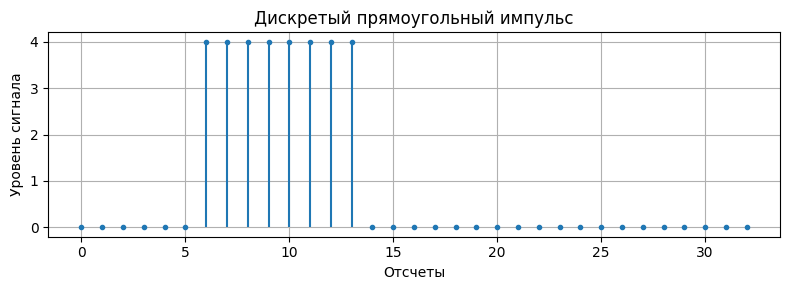

In [22]:
signals_plot([s1], ["Дискретый прямоугольный импульс"])

Дискретный прямоугольный импульс с началом $k=n_0$ и длительностью $n_{imp}$ моделируется как разность двух дискретных единичных скачков с задержками $n_0$ и $n_0 + n_{imp}$ соответственно. Для получения амплитуды $U$, каждый скачок умножается на $U$.

# Задание 2

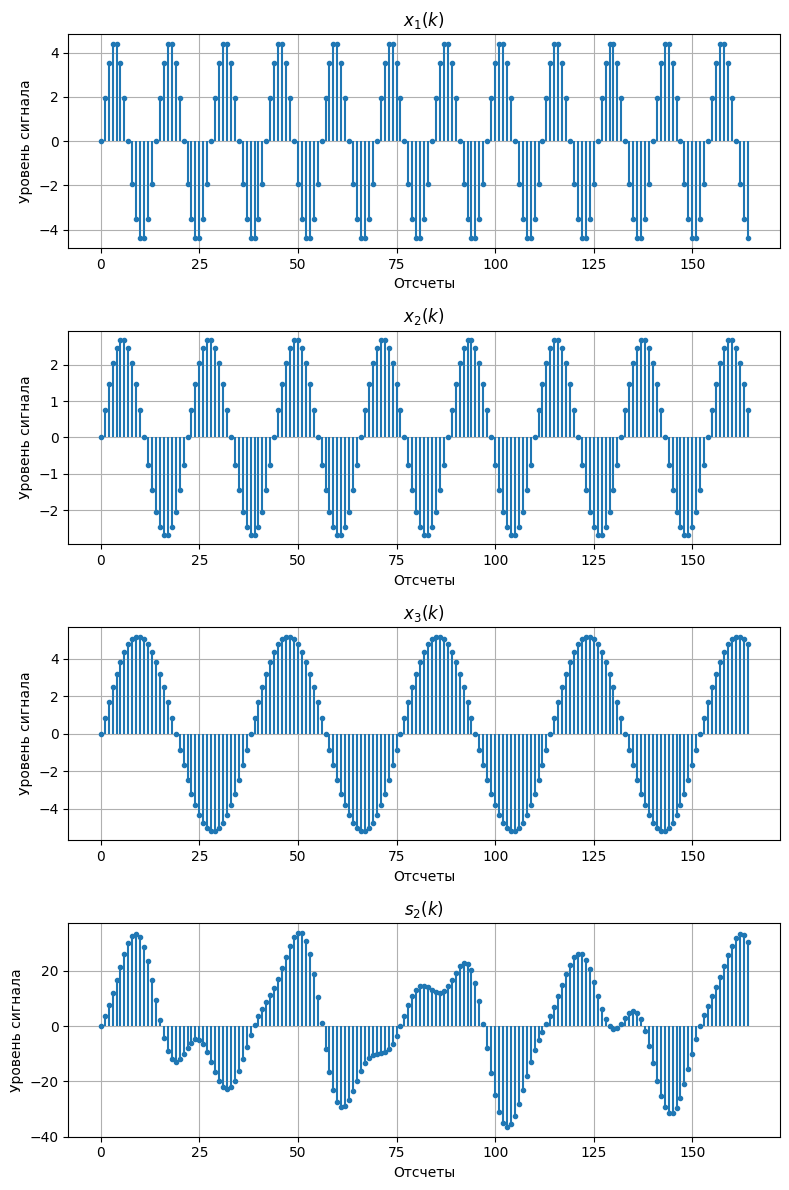

In [32]:
k = np.arange(0, 5 * N)

def x_i(B_i, w_i, k):
  return B_i * np.sin(w_i * k)

x1 = x_i(B1, w1, k)
x2 = x_i(B2, w2, k)
x3 = x_i(B3, w3, k)
s2 = a1 * x1 + a2 * x2 + a3 * x3

signals_plot([x1, x2, x3, s2], ["$x_1(k)$", "$x_2(k)$", "$x_3(k)$", "$s_2(k)$"])

In [37]:
def mean(signal, T):
  return 1 / T * np.sum(signal[:T])

def energy(signal, T):
  return np.sum(signal[:T] ** 2)

def power(signal, T):
  return 1 / T * np.sum(signal[:T] ** 2)

T1 = int(2 * math.pi / w1)
T2 = int(2 * math.pi / w2)
T3 = int(2 * math.pi / w3)
T = math.lcm(T1, T2, T3)

t = np.arange(0, T)
x1 = x_i(B1, w1, t)
x2 = x_i(B2, w2, t)
x3 = x_i(B3, w3, t)
s2 = a1 * x1 + a2 * x2 + a3 * x3

mean_s2 = mean(s2, T)
E = energy(s2, T)
P = power(s2, T)
print(f"mean_s2 = {mean_s2}\nE = {E}\nP = {P}")

mean_s2 = 1.5250199523490872e-15
E = 978537.7910000004
P = 334.42850000000016


1. Последовательности $x_i(k)$ моделируются с помощью функции np.sin() и умножения на значение амплитуды. Последовательность $s_2(k)$ моделируется как сумма последовательностей $x_i(k)$, умноженных на соответствующие коэффициенты $a_i$

2. Среднее значение периодического сигнала $s(t)$ с периодом $T$ определяется как:
$$\overline{s} = \frac{1}{T} \sum_{t=0}^{T - 1} s(t) $$
Энергия периодического сигнала $s(t)$ на одном периоде определяется как:
$$E = \sum_{t=0}^{T - 1} |s(t)|^2 $$
Средняя мощность периодического сигнала $s(t)$ с периодом $T$ определяется как:
$$\overline{P} = \frac{1}{T} \sum_{t=0}^{T - 1} |s(t)|^2 $$
Сигнал $s_2(k)$ получен из сигналов с различными периодами $T_1 = \frac{2\pi}{\omega_1}, T_2 = \frac{2\pi}{\omega_2}, T_3 = \frac{2\pi}{\omega_3}$, поэтому его период будет равен наименьшему общему кратному этих периодов: $T = lcm(T_1, T_2, T_3)$.

# Задание 3

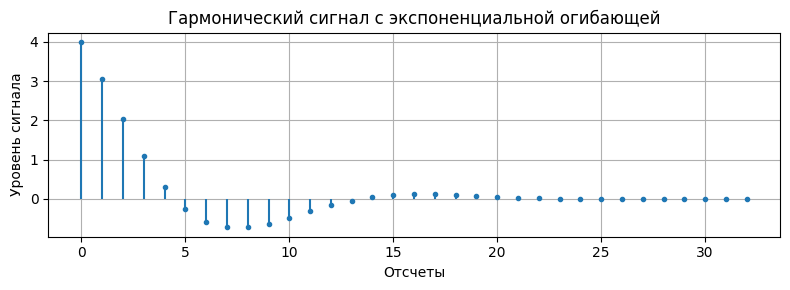

In [42]:
k = np.arange(0, N)

s = C * np.cos(w0 * k)
s_exp = abs(a) ** k
s3 = s_exp * s

signals_plot([s3], ["Гармонический сигнал с экспоненциальной огибающей"])

Аналитическая запись сигнала: $s_3(k) = |a|^k C \cos(\omega_0 k)$. Сигнал был получен как поэлементное умножение двух последовательностей $s(k) = C \cos(\omega_0 k)$ и $s_{exp} = |a|^k$.

# Задание 4

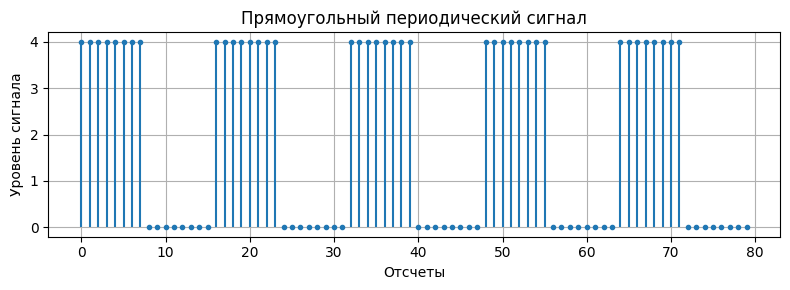

In [47]:
def rect_signal(U, tau, T, k):
  return U * (k % T <= tau - 1).astype(int)

k = np.arange(0, n_imp * 2 * 5)
s4 = rect_signal(U, n_imp, n_imp * 2, k)

signals_plot([s4], ["Прямоугольный периодический сигнал"])

Для моделирования прямоугольного периодическог сигнала была определена функция, обрабатывающая последовательность следующим образом:
$
s_4(k) =
\begin{cases}
U, & 0 \le k \text{ mod T} \le \tau - 1,\\
0, & otherwise,
\end{cases}
\quad k \in ℕ$, где

$U$ - амплитуда, $T$ - период, $\tau$ - длительность импульса

# Выводы

В ходе работы были изучены математические модели линейных комбинаций дискретных сигналов и разработаны програмные средства для их моделирования.